In [1]:
import pandas as pd
import numpy as np

# helpful character encoding module
import charset_normalizer

# set seed for reproducibility
np.random.seed(0)

# opening the file
with open('h1-b.csv', 'rb') as rawdata:
   result = charset_normalizer.detect(rawdata.read(30000))
   print(result)

# read in the file with the encoding detected by charset_normalizer
h1 = pd.read_csv("h1-b.csv", encoding='Windows-1252')

# look at the first few lines
h1.head()

{'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}


C:\Users\User\AppData\Local\Temp\ipykernel_22748\3586320196.py:16: DtypeWarning: Columns (12,97) have mixed types. Specify dtype option on import or set low_memory=False.
  h1 = pd.read_csv("h1-b.csv", encoding='Windows-1252')


,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE_PROVINCE,...,FOREIGN_WORKER_ALT_ED_EXP,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,EMP_INFO_DECL_NAME,EMP_DECL_TITLE
0,Withdrawn,10/2/2022,10/2/2022,N,NaN,NaN,N,Westgate Shellworld Inc,Orlando,FLORIDA,...,NaN,NaN,NaN,N,N,N,FRANCES DELAFUENTE,ATTORNEY,SAMIA AHMED,OWNER
1,Certified-Expired,2/3/2022,10/3/2022,N,NaN,NaN,N,"NIKE, INC.",BEAVERTON,OREGON,...,NaN,Y,N,N,Y,N,Chad T Li,Associate Attorney,Diana Loveless,Immigration Program Consultant
2,Denied,11/30/2021,10/3/2022,N,NaN,NaN,N,RIVERY TECHNOLOGIES INC,NEW YORK,NEW YORK,...,NaN,Y,N,N,Y,N,Rakhel S Milstein,Attorney,Aviv Noy,CoFounder
3,Certified-Expired,2/3/2022,10/3/2022,N,NaN,NaN,N,ESRI INC.,REDLANDS,CALIFORNIA,...,NaN,Y,N,N,Y,N,Jessica L Cross,Attorney,Vinesh Patel,Global Mobility Coordinator
4,Certified-Expired,2/3/2022,10/3/2022,N,NaN,NaN,N,INGURAN LLC DBA STGENETICS,NAVASOTA,TEXAS,...,NaN,NaN,N,N,Y,N,Beatriz Trillos Ballerini,Attorney,Steven Sfamenos,Human Resources Director


In [2]:
# Convert the date columns to datetime
h1['SWA_JOB_ORDER_START_DATE'] = pd.to_datetime(h1['SWA_JOB_ORDER_START_DATE'])
h1['SWA_JOB_ORDER_END_DATE'] = pd.to_datetime(h1['SWA_JOB_ORDER_END_DATE'])

# Calculate the period in number of years
h1['Job Offer Period'] = (h1['SWA_JOB_ORDER_END_DATE'] - h1['SWA_JOB_ORDER_START_DATE']).dt.days / 365.25
h1 = h1.drop(['SWA_JOB_ORDER_END_DATE', 'SWA_JOB_ORDER_START_DATE'], axis=1)

# having a look at the last few rows
h1.head(-1)

,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE_PROVINCE,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,EMP_INFO_DECL_NAME,EMP_DECL_TITLE,Job Offer Period
0,Withdrawn,10/2/2022,10/2/2022,N,NaN,NaN,N,Westgate Shellworld Inc,Orlando,FLORIDA,...,NaN,NaN,N,N,N,FRANCES DELAFUENTE,ATTORNEY,SAMIA AHMED,OWNER,0.095825
1,Certified-Expired,2/3/2022,10/3/2022,N,NaN,NaN,N,"NIKE, INC.",BEAVERTON,OREGON,...,Y,N,N,Y,N,Chad T Li,Associate Attorney,Diana Loveless,Immigration Program Consultant,0.084873
2,Denied,11/30/2021,10/3/2022,N,NaN,NaN,N,RIVERY TECHNOLOGIES INC,NEW YORK,NEW YORK,...,Y,N,N,Y,N,Rakhel S Milstein,Attorney,Aviv Noy,CoFounder,0.093087
3,Certified-Expired,2/3/2022,10/3/2022,N,NaN,NaN,N,ESRI INC.,REDLANDS,CALIFORNIA,...,Y,N,N,Y,N,Jessica L Cross,Attorney,Vinesh Patel,Global Mobility Coordinator,0.090349
4,Certified-Expired,2/3/2022,10/3/2022,N,NaN,NaN,N,INGURAN LLC DBA STGENETICS,NAVASOTA,TEXAS,...,NaN,N,N,Y,N,Beatriz Trillos Ballerini,Attorney,Steven Sfamenos,Human Resources Director,0.084873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86195,Certified,9/16/2022,6/30/2023,N,NaN,NaN,N,POLMAX LLC dba Experior Transport,Alsip,ILLINOIS cook,...,NaN,N,N,N,N,Christopher E Kurczaba,attorney,Tomasz Dulian,President,0.082136
86196,Certified,9/14/2022,6/30/2023,N,NaN,NaN,N,KMSB Enterprises LLC,Jacksonville,FLORIDA,...,NaN,NaN,N,N,N,Richard L Kent,Legal Counsel,Krista Smith,PresidentOwner,0.095825
86197,Certified,9/15/2022,6/30/2023,N,NaN,NaN,N,SOUTH GEORGIA PECAN COMPANY,VALDOSTA,GEORGIA,...,NaN,NaN,N,N,Y,,NaN,STEVE M DALE,HR DIRECTOR,0.082136
86198,Certified,9/15/2022,6/30/2023,N,NaN,NaN,N,SOUTH GEORGIA PECAN COMPANY,VALDOSTA,GEORGIA,...,NaN,NaN,N,N,Y,,NaN,STEVE M DALE,HR DIRECTOR,0.082136


In [3]:
# looking for columns with NAN
#getting the number of missing values
missing_values_sum = h1.isnull().sum()
missing_values_sum

# converting to a dataframe
df = pd.DataFrame(h1)

# percentage of missing values
total_missing = missing_values_sum.sum()
total_cells = np.product(df.shape)
percent_missing = (total_missing / total_cells) * 100
percent_missing

33.76589134696813

In [4]:
df.shape

(86201, 125)

In [5]:
# removing those who withdrew their application
# Specify the value to filter
value_to_remove = 'Withdrawn'

# Filter and remove rows containing the specified value
df = df[df['CASE_STATUS'] != value_to_remove]

# removing those whose status are certified-expired
# Specify the value to filter
value_to_remove = 'Certified-Expired'

# Filter and remove rows containing the specified value
df = df[df['CASE_STATUS'] != value_to_remove]

# Create a mapping for unit conversion
unit_mapping = {'Year': 1, 'Month': 12, 'Week': 52, 'Day': 365, 'Hour': 2080}  # Assuming 40 hours per week for 52 weeks

# Transform wages to be in years
df['PW_WAGE'] = df.apply(lambda row: row['PW_WAGE'] * unit_mapping.get(row['PW_UNIT_OF_PAY'], 1), axis=1)

# Drop the "Unit of Wages" column (no longer needed)
df = df.drop(columns=['PW_UNIT_OF_PAY'])

In [6]:
# replacing YES and No with 1 and 0 respectively
df.replace({'Y': 1, 'N': 0}, inplace=True)

# replacing Denied and Certified with 0 and 1 respectively
df.replace({'Denied': 0, 'Certified': 1}, inplace=True)

In [7]:
# converting the PW_WAGE column to int data type
df = df[~df['PW_WAGE'].isin([np.inf, -np.inf])]
df['PW_WAGE'] = pd.to_numeric(df['PW_WAGE'].replace('[^\d.]', '', regex=True), errors='coerce')

In [8]:
# looking at the numerical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
len(numerical_cols)

# looking at the categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
len(categorical_cols)

# converting the list of numerical and categorical columns into a dataframe
numerical_df = df[numerical_cols]

In [9]:
# looking for correlations among the numerical features
corr_matrix = numerical_df.corr()
corr_matrix["CASE_STATUS"].sort_values(ascending=False)

CASE_STATUS                           1.000000
REQUIRED_TRAINING_MONTHS              0.585044
COMPETITIVE_PROCESS                   0.567755
PROFESSIONAL_OCCUPATION               0.348592
US_WORKERS_CONSIDERED                 0.326857
FOREIGN_WORKER_CURR_EMPLOYED          0.311946
ACCEPT_ALT_OCCUPATION                 0.274347
PW_WAGE                               0.251911
ACCEPT_FOREIGN_EDUCATION              0.220345
FOREIGN_WORKER_LIVE_IN_DOM_SVC_CNT    0.217108
ACCEPT_ALT_FIELD_OF_STUDY             0.190545
BARGAINING_REP_NOTIFIED               0.161562
ACCEPT_ALT_COMBO                      0.130721
POSTED_NOTICE_AT_WORKSITE             0.118268
SUNDAY_EDITION_NEWSPAPER              0.111623
REQUIRED_EXPERIENCE                   0.110621
FOREIGN_WORKER_YRS_ED_COMP            0.105783
EMPLOYER_NUM_EMPLOYEES                0.097336
FOREIGN_WORKER_ALT_OCC_EXP            0.052617
LAYOFF_IN_PAST_SIX_MONTHS             0.047748
OFFERED_TO_APPL_FOREIGN_WORKER        0.042254
FOREIGN_WORKE

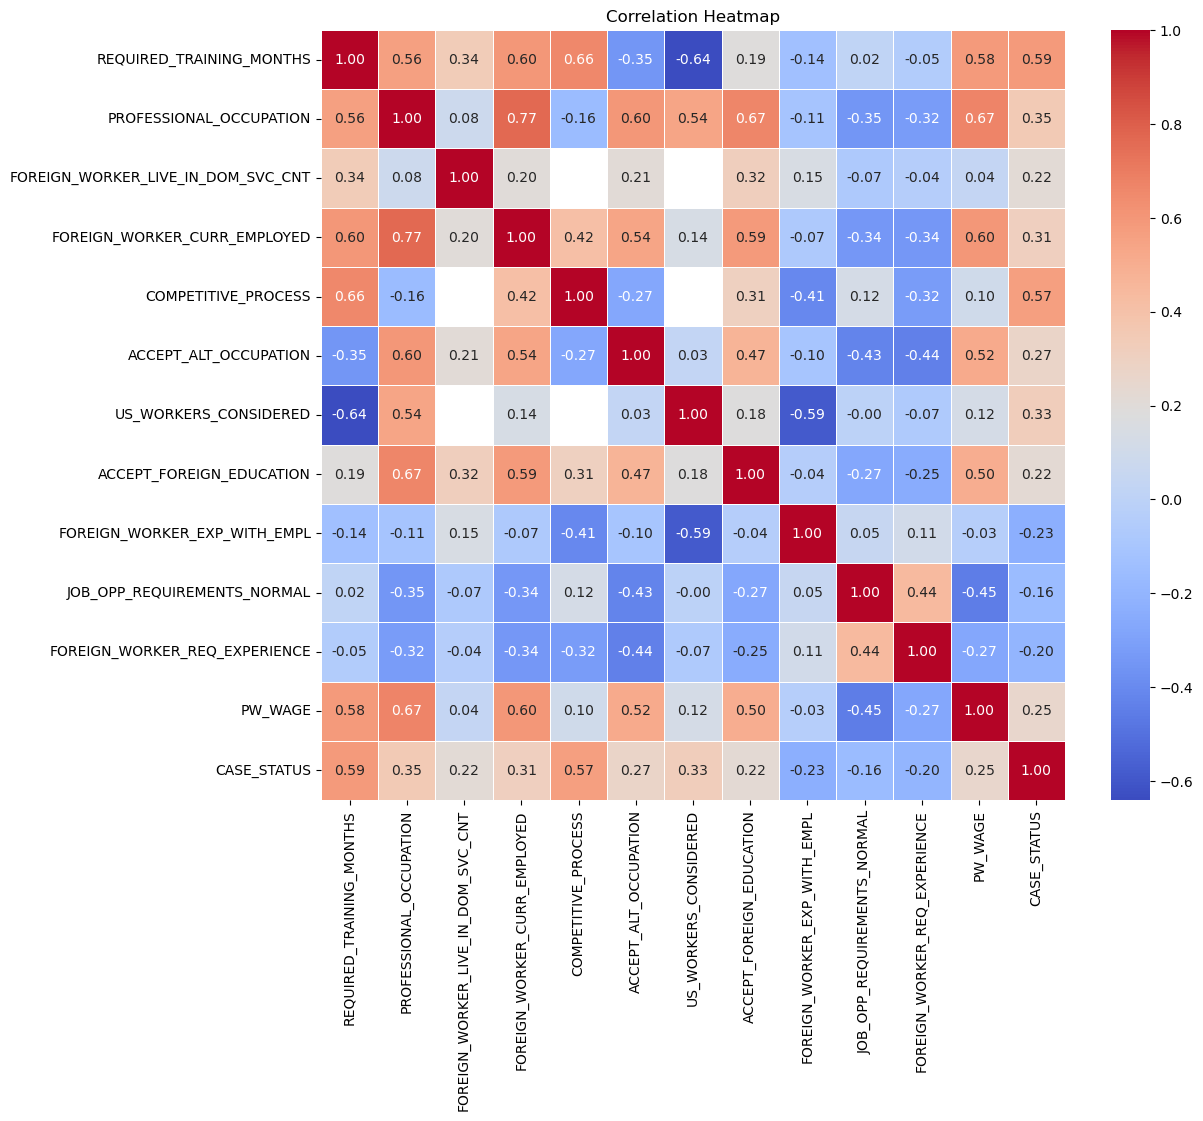

In [10]:
# visualizing the correlation between some selected numerical 
#columns(based on the correlation scores) and the case status column
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and selected_columns is a list of column names
selected_columns = ['REQUIRED_TRAINING_MONTHS', 'PROFESSIONAL_OCCUPATION', 'FOREIGN_WORKER_LIVE_IN_DOM_SVC_CNT', 'FOREIGN_WORKER_CURR_EMPLOYED',
                    'COMPETITIVE_PROCESS', 'ACCEPT_ALT_OCCUPATION', 'US_WORKERS_CONSIDERED', 'ACCEPT_FOREIGN_EDUCATION', 'FOREIGN_WORKER_EXP_WITH_EMPL',
                    'JOB_OPP_REQUIREMENTS_NORMAL', 'FOREIGN_WORKER_REQ_EXPERIENCE', 'PW_WAGE']
df_selected = df[selected_columns + ['CASE_STATUS']]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [11]:
# Assuming df is your DataFrame and columns_of_interest are your categorical columns
columns_of_interest = ['AGENT_ATTORNEY_FIRM_NAME','NAICS_CODE', 'WORKSITE_STATE', 'MAJOR_FIELD_OF_STUDY', 'SPECIFIC_SKILLS', 
                      'COUNTRY_OF_CITIZENSHIP', 'FOREIGN_WORKER_EDUCATION', 'EMP_DECL_TITLE']  # Replace with your actual column names

# Select columns of interest and the target column
df_interest = df[columns_of_interest + ['CASE_STATUS']]

sample_size = 500  # Adjust the sample size as needed
df_sample = df_interest.sample(n=sample_size, random_state=42)

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df_sample, columns=columns_of_interest)

# Calculate the correlation matrix
cat_correlation_matrix = df_encoded.corr()

# Display the correlation values with respect to 'CASE_STATUS'
print(cat_correlation_matrix['CASE_STATUS'].sort_values(ascending=False))



CASE_STATUS                                                        1.000000
COUNTRY_OF_CITIZENSHIP_INDIA                                       0.183613
FOREIGN_WORKER_EDUCATION_Master's                                  0.155811
MAJOR_FIELD_OF_STUDY_See H.14                                      0.118047
AGENT_ATTORNEY_FIRM_NAME_Fragomen, Del Rey, Bernsen  Loewy, LLP    0.115514
                                                                     ...   
EMP_DECL_TITLE_SUPERVISOR                                         -0.194468
NAICS_CODE_561730.0                                               -0.199364
WORKSITE_STATE_MISSOURI                                           -0.228980
SPECIFIC_SKILLS_NONE                                              -0.228980
EMP_DECL_TITLE_Director of Workforce Development                  -0.238414
Name: CASE_STATUS, Length: 1416, dtype: float64


In [12]:
# creating a new csv based on the correlation results

relevant_columns = ['CASE_STATUS', 'AGENT_ATTORNEY_FIRM_NAME', 'NAICS_CODE', 'WORKSITE_STATE', 'MAJOR_FIELD_OF_STUDY', 'SPECIFIC_SKILLS', 
                    'COUNTRY_OF_CITIZENSHIP', 'FOREIGN_WORKER_EDUCATION', 'EMP_DECL_TITLE', 'REQUIRED_TRAINING_MONTHS', 
                    'PROFESSIONAL_OCCUPATION', 'FOREIGN_WORKER_LIVE_IN_DOM_SVC_CNT', 'FOREIGN_WORKER_CURR_EMPLOYED', 
                    'COMPETITIVE_PROCESS', 'ACCEPT_ALT_OCCUPATION', 'US_WORKERS_CONSIDERED', 'ACCEPT_FOREIGN_EDUCATION', 
                    'FOREIGN_WORKER_EXP_WITH_EMPL', 'JOB_OPP_REQUIREMENTS_NORMAL', 'FOREIGN_WORKER_REQ_EXPERIENCE', 'PW_WAGE']

new_df = df[relevant_columns]

# Save the new dataset to a CSV file
new_df.to_csv('new_df.csv', index=False)

new_df.head()

,CASE_STATUS,AGENT_ATTORNEY_FIRM_NAME,NAICS_CODE,WORKSITE_STATE,MAJOR_FIELD_OF_STUDY,SPECIFIC_SKILLS,COUNTRY_OF_CITIZENSHIP,FOREIGN_WORKER_EDUCATION,EMP_DECL_TITLE,REQUIRED_TRAINING_MONTHS,...,FOREIGN_WORKER_LIVE_IN_DOM_SVC_CNT,FOREIGN_WORKER_CURR_EMPLOYED,COMPETITIVE_PROCESS,ACCEPT_ALT_OCCUPATION,US_WORKERS_CONSIDERED,ACCEPT_FOREIGN_EDUCATION,FOREIGN_WORKER_EXP_WITH_EMPL,JOB_OPP_REQUIREMENTS_NORMAL,FOREIGN_WORKER_REQ_EXPERIENCE,PW_WAGE
2,0,Milstein Law Group PLLC,54199,NEW YORK,"Information Systems, Computer Engineering, or ...",Must have a Bachelors Degree in Information Sy...,ISRAEL,Bachelor's,CoFounder,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,0.0,1,NaN,224307.0
636,0,Tancinco Law P.C.,623312,WASHINGTON,NaN,NaN,PHILIPPINES,High School,AdministratorOwner,NaN,...,NaN,0.0,NaN,1.0,NaN,1.0,NaN,1,0.0,25667.0
646,0,NaN,722513,WISCONSIN,NaN,NaN,NEPAL,NaN,Director of Human Resources,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1,NaN,17805.0
647,0,NaN,722513,WISCONSIN,NaN,NaN,NEPAL,NaN,Director of Human Resources,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1,NaN,17805.0
692,0,AMERIGO LEGAL GROUP PLLC,336212,WISCONSIN,NaN,NONE,COLOMBIA,High School,TALENT ACQUISITION MANAGER,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1,NaN,29411.0


In [13]:
# percentage of missing values
missing_values_sum = new_df.isnull().sum()
total_missing = missing_values_sum.sum()
total_cells = np.product(new_df.shape)
percent_missing = (total_missing / total_cells) * 100
percent_missing

25.12668940255147

In [14]:
missing_values_sum[0:10]

CASE_STATUS                     0
AGENT_ATTORNEY_FIRM_NAME     6103
NAICS_CODE                     41
WORKSITE_STATE                  5
MAJOR_FIELD_OF_STUDY        12479
SPECIFIC_SKILLS              7189
COUNTRY_OF_CITIZENSHIP          5
FOREIGN_WORKER_EDUCATION     8646
EMP_DECL_TITLE                  9
REQUIRED_TRAINING_MONTHS    55934
dtype: int64

In [15]:
missing_values_sum[10:21]

PROFESSIONAL_OCCUPATION                   0
FOREIGN_WORKER_LIVE_IN_DOM_SVC_CNT    56479
FOREIGN_WORKER_CURR_EMPLOYED              3
COMPETITIVE_PROCESS                   55687
ACCEPT_ALT_OCCUPATION                     8
US_WORKERS_CONSIDERED                 54706
ACCEPT_FOREIGN_EDUCATION                  6
FOREIGN_WORKER_EXP_WITH_EMPL          13224
JOB_OPP_REQUIREMENTS_NORMAL               0
FOREIGN_WORKER_REQ_EXPERIENCE         26836
PW_WAGE                                1032
dtype: int64

In [16]:
# dropping rows with NAN
new_df = new_df.dropna(subset=['AGENT_ATTORNEY_FIRM_NAME', 'NAICS_CODE', 'WORKSITE_STATE', 'SPECIFIC_SKILLS', 'COUNTRY_OF_CITIZENSHIP', 
                      'FOREIGN_WORKER_EDUCATION', 'EMP_DECL_TITLE', 'FOREIGN_WORKER_CURR_EMPLOYED', 'ACCEPT_ALT_OCCUPATION', 
                      'ACCEPT_FOREIGN_EDUCATION', 'PW_WAGE'], how='any')

In [17]:
 #dropping some columns
columns_to_drop = ['MAJOR_FIELD_OF_STUDY', 'REQUIRED_TRAINING_MONTHS', 'FOREIGN_WORKER_LIVE_IN_DOM_SVC_CNT', 'COMPETITIVE_PROCESS', 
                  'US_WORKERS_CONSIDERED', 'FOREIGN_WORKER_EXP_WITH_EMPL', 'FOREIGN_WORKER_REQ_EXPERIENCE']
new_df = new_df.drop(columns=columns_to_drop, axis=1)

In [18]:
new_df.shape

(40971, 14)

In [19]:
# percentage of missing values
missing_values_sum = new_df.isnull().sum()
total_missing = missing_values_sum.sum()
total_cells = np.product(new_df.shape)
percent_missing = (total_missing / total_cells) * 100
percent_missing

0.0

In [20]:
!pip install xgboost

In [21]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
features = ['AGENT_ATTORNEY_FIRM_NAME', 'NAICS_CODE', 'WORKSITE_STATE', 'SPECIFIC_SKILLS', 'COUNTRY_OF_CITIZENSHIP', 
            'FOREIGN_WORKER_EDUCATION', 'EMP_DECL_TITLE', 'PROFESSIONAL_OCCUPATION', 'FOREIGN_WORKER_CURR_EMPLOYED',
            'ACCEPT_ALT_OCCUPATION','ACCEPT_FOREIGN_EDUCATION', 'JOB_OPP_REQUIREMENTS_NORMAL', 'PW_WAGE']

# converting float numerical columns to int
selected_cols = ['PROFESSIONAL_OCCUPATION', 'FOREIGN_WORKER_CURR_EMPLOYED', 'ACCEPT_ALT_OCCUPATION', 
                 'ACCEPT_FOREIGN_EDUCATION', 'JOB_OPP_REQUIREMENTS_NORMAL', 'PW_WAGE']

new_df[selected_cols] = new_df[selected_cols].astype(int)

selected_cols2 = ['AGENT_ATTORNEY_FIRM_NAME', 'NAICS_CODE', 'WORKSITE_STATE', 'SPECIFIC_SKILLS', 'COUNTRY_OF_CITIZENSHIP', 
                  'FOREIGN_WORKER_EDUCATION', 'EMP_DECL_TITLE']
new_df[selected_cols2] = new_df[selected_cols2].astype(str)

X = new_df.copy()
y = X.pop('CASE_STATUS')
X = X.loc[:, features]

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

new_cat_cols = ['AGENT_ATTORNEY_FIRM_NAME', 'NAICS_CODE', 'WORKSITE_STATE', 'SPECIFIC_SKILLS', 'COUNTRY_OF_CITIZENSHIP',
                'FOREIGN_WORKER_EDUCATION', 'EMP_DECL_TITLE']

new_num_cols = ['PROFESSIONAL_OCCUPATION', 'FOREIGN_WORKER_CURR_EMPLOYED', 'ACCEPT_ALT_OCCUPATION',
                'ACCEPT_FOREIGN_EDUCATION', 'JOB_OPP_REQUIREMENTS_NORMAL', 'PW_WAGE']


# Define the transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, new_num_cols),
        ('cat', categorical_transformer, new_cat_cols)
    ])

# Create a pipeline to apply the column transformer and any subsequent steps
from xgboost import XGBClassifier
model =  XGBClassifier(n_estimators=500, learning_rate=0.05, n_jobs=4, verbose=False)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

model_fit = pipeline.fit(X_train, y_train) 

predictions = model_fit.predict(X_valid)

C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [05:47:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


In [23]:
print(predictions)

[1 0 1 ... 1 1 1]


In [24]:
# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_valid, predictions)
conf_matrix = confusion_matrix(y_valid, predictions)
classification_rep = classification_report(y_valid, predictions)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9646125686394142
Confusion Matrix:
[[  63  286]
 [   4 7842]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.18      0.30       349
           1       0.96      1.00      0.98      7846

    accuracy                           0.96      8195
   macro avg       0.95      0.59      0.64      8195
weighted avg       0.96      0.96      0.95      8195



In [25]:
class_distribution = df['CASE_STATUS'].value_counts()
print(class_distribution)

CASE_STATUS
1    51453
0     5097
Name: count, dtype: int64


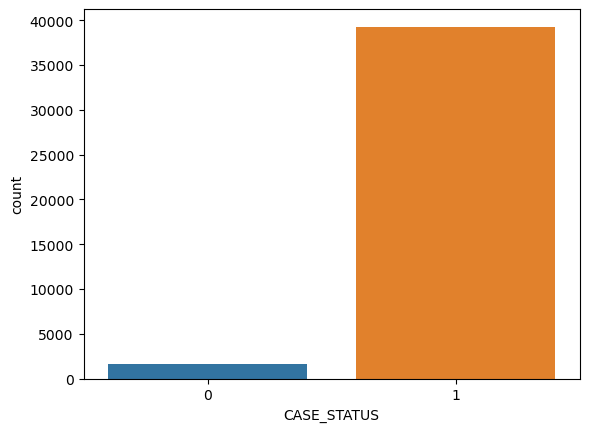

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='CASE_STATUS', data=new_df)
plt.show()

In [27]:
imbalance_ratio = class_distribution[0] / class_distribution[1]
print(f"Class Imbalance Ratio: {imbalance_ratio}")

Class Imbalance Ratio: 0.09906127922570113


In [36]:
features_1 = ['AGENT_ATTORNEY_FIRM_NAME', 'NAICS_CODE', 'WORKSITE_STATE', 'SPECIFIC_SKILLS', 'COUNTRY_OF_CITIZENSHIP', 
            'FOREIGN_WORKER_EDUCATION', 'EMP_DECL_TITLE', 'PROFESSIONAL_OCCUPATION', 'FOREIGN_WORKER_CURR_EMPLOYED',
            'ACCEPT_ALT_OCCUPATION','ACCEPT_FOREIGN_EDUCATION', 'JOB_OPP_REQUIREMENTS_NORMAL', 'PW_WAGE']

# converting float numerical columns to int
selected_col = ['PROFESSIONAL_OCCUPATION', 'FOREIGN_WORKER_CURR_EMPLOYED', 'ACCEPT_ALT_OCCUPATION', 
                 'ACCEPT_FOREIGN_EDUCATION', 'JOB_OPP_REQUIREMENTS_NORMAL', 'PW_WAGE']

new_df[selected_col] = new_df[selected_col].astype(int)

selected_col2 = ['AGENT_ATTORNEY_FIRM_NAME', 'NAICS_CODE', 'WORKSITE_STATE', 'SPECIFIC_SKILLS', 'COUNTRY_OF_CITIZENSHIP', 
                  'FOREIGN_WORKER_EDUCATION', 'EMP_DECL_TITLE']
new_df[selected_col2] = new_df[selected_col2].astype(str)

X_1 = new_df.copy()
y_1 = X_1.pop('CASE_STATUS')
X_1 = X_1.loc[:, features_1]
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier

new_cat_col = ['AGENT_ATTORNEY_FIRM_NAME', 'NAICS_CODE', 'WORKSITE_STATE', 'SPECIFIC_SKILLS', 'COUNTRY_OF_CITIZENSHIP',
                'FOREIGN_WORKER_EDUCATION', 'EMP_DECL_TITLE']

new_num_col = ['PROFESSIONAL_OCCUPATION', 'FOREIGN_WORKER_CURR_EMPLOYED', 'ACCEPT_ALT_OCCUPATION',
                'ACCEPT_FOREIGN_EDUCATION', 'JOB_OPP_REQUIREMENTS_NORMAL', 'PW_WAGE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Identify numerical and categorical columns
new_num_col = X.select_dtypes(include=['float64']).columns
new_cat_col = X.select_dtypes(include=['object']).columns

# Create a column transformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, new_num_col),
        ('cat', categorical_transformer, new_cat_col)
    ])

# Create a pipeline with the preprocessor and neural network
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=1)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = pipeline.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9600


In [37]:
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9600


In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model_fit = pipeline.fit(X_train, y_train)
predictions_1 = model_fit.predict(X_valid)
accuracy = accuracy_score(y_valid, predictions_1)
conf_matrix = confusion_matrix(y_valid, predictions_1)
classification_rep = classification_report(y_valid, predictions_1)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9904820012202562
Confusion Matrix:
[[ 289   60]
 [  18 7828]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       349
           1       0.99      1.00      1.00      7846

    accuracy                           0.99      8195
   macro avg       0.97      0.91      0.94      8195
weighted avg       0.99      0.99      0.99      8195



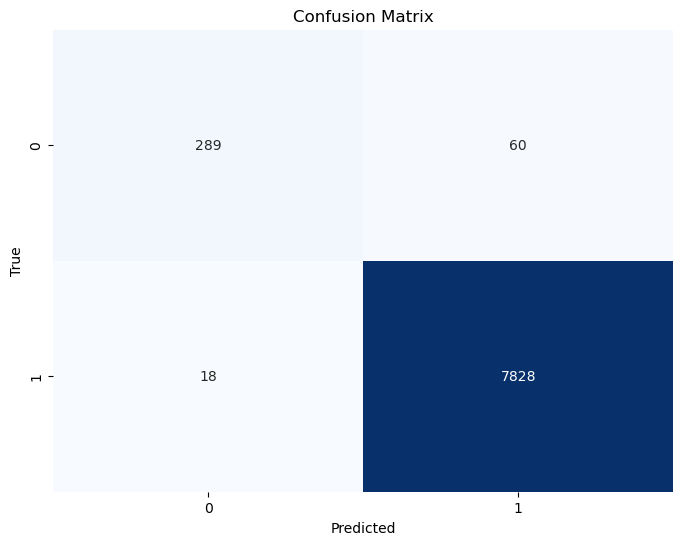

In [39]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

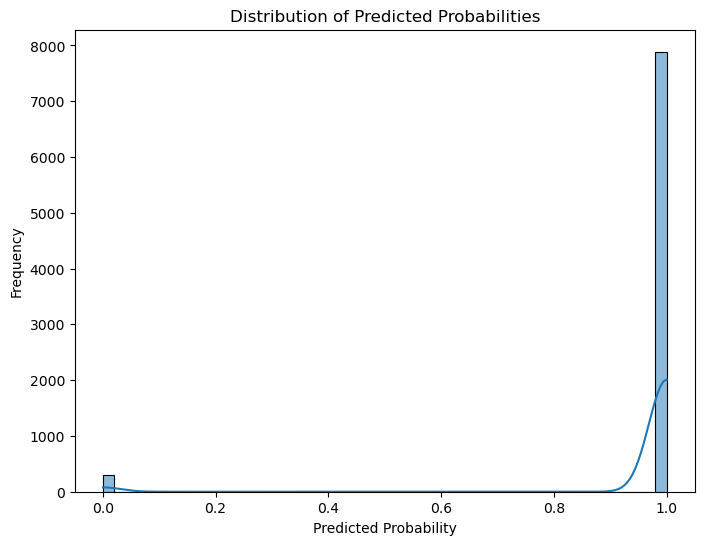

In [40]:
# Create a histogram for the predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(predictions_1, bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()